Day 6 of Python Summer Party
by Interview Master

Ben & Jerry's

Ice Cream Sales Seasonal Performance Assessment

You are a Product Insights Analyst working with the Ben & Jerry's sales strategy team to investigate seasonal sales patterns through comprehensive data analysis. The team wants to understand how temperature variations and unique transaction characteristics impact ice cream sales volume. Your goal is to perform detailed data cleaning and exploratory analysis to uncover meaningful insights about seasonal sales performance.

Question 1 of 3

Identify and remove any duplicate sales transactions from the dataset to ensure accurate analysis of seasonal patterns.

In [1]:
import numpy as np
import pandas as pd
#For Boxplot Visualization
import matplotlib.pyplot as plt
%matplotlib inline


Importing Data

In [2]:
# Load the ice cream sales data
icsd_data = pd.read_csv('ice_cream_sales_data.csv')
icsd_df = icsd_data.copy()
icsd_df


,sale_date,temperature,product_name,sales_volume,transaction_id
0,2024-07-05,62.0,Cherry Garcia,23,TX0001
1,2024-08-15,64.0,Chunky Monkey,26,TX0002
2,2024-09-25,66.0,Phish Food,29,TX0003
3,2024-10-05,68.0,Americone Dream,32,TX0004
4,2024-11-15,70.0,Chocolate Fudge Brownie,35,TX0005
...,...,...,...,...,...
56,2025-03-25,81.0,Cherry Garcia,61,TX0057
57,2025-04-05,83.0,Chunky Monkey,64,TX0058
58,2025-05-15,85.0,Phish Food,67,TX0059
59,2025-06-25,87.0,Americone Dream,70,TX0060


Data Sanity Checks and Initial Analysis 

In [3]:
# Display initial information about the dataframe
icsd_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sale_date       61 non-null     object 
 1   temperature     59 non-null     float64
 2   product_name    61 non-null     object 
 3   sales_volume    61 non-null     int64  
 4   transaction_id  61 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.5+ KB


Comments: We can see from the dataframe information that there is a total of 61 entries and there are mising values only on the temperature column.

Duplicate values are yet to be found 

In [4]:
# Comments: We can see from the dataframe information that there is a total of 61 entries and there are mising values only on the temperature column.
# Duplicate values are yet to be found 

# Finding null values in the dataframe
missing_values = icsd_df.isnull().sum()
print("The number of missing values in each column of the data set is:");
print(missing_values)


The number of missing values in each column of the data set is:
sale_date         0
temperature       2
product_name      0
sales_volume      0
transaction_id    0
dtype: int64


In [5]:
# Identifying all null values
all_missing_rows = icsd_df[icsd_df.isnull().any(axis=1)]
print("All rows with missing values in the data set are:");
print(all_missing_rows)


All rows with missing values in the data set are:
     sale_date  temperature   product_name  sales_volume transaction_id
21  2025-04-05          NaN  Cherry Garcia            86         TX0022
54  2025-01-05          NaN     Half Baked            55         TX0055


In [6]:
# Checking complete duplicate record
duplicate_record = icsd_df.duplicated().sum()
print("The number of duplicate records in the data set is:");
print(duplicate_record)


The number of duplicate records in the data set is:
1


In [7]:
# Identifying all duplicate rows including the first occurrence
all_duplicate_rows = icsd_df[icsd_df.duplicated(keep=False)]
print("All duplicate rows in the data set are:");
print(all_duplicate_rows)


All duplicate rows in the data set are:
     sale_date  temperature   product_name  sales_volume transaction_id
29  2024-12-25         89.0  Chunky Monkey           110         TX0030
60  2024-12-25         89.0  Chunky Monkey           110         TX0030


Based on the two results above, we can see that there are two rows with Null Vlues for temperature and one complete duplicate row. 

Taking into account the dataframe is of 61 records, it seems fitting that it should be 60. So we will determine to remove or "drop" the duplicate row.

In [8]:
# Address the null values by replacing them with the mean of the column
icsd_df['temperature'] = icsd_df["temperature"].fillna(icsd_df["temperature"].median())
icsd_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sale_date       61 non-null     object 
 1   temperature     61 non-null     float64
 2   product_name    61 non-null     object 
 3   sales_volume    61 non-null     int64  
 4   transaction_id  61 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.5+ KB


In [9]:
# Dropping duplicate rows
icsd_df = icsd_df.drop_duplicates()
icsd_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sale_date       60 non-null     object 
 1   temperature     60 non-null     float64
 2   product_name    60 non-null     object 
 3   sales_volume    60 non-null     int64  
 4   transaction_id  60 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.8+ KB


In [10]:
cleaned_icsd_df = icsd_df
print("The cleaned data set without null values and duplicate records is:");
print(cleaned_icsd_df)
print(cleaned_icsd_df.info())


The cleaned data set without null values and duplicate records is:
     sale_date  temperature                product_name  sales_volume  \
0   2024-07-05         62.0               Cherry Garcia            23   
1   2024-08-15         64.0               Chunky Monkey            26   
2   2024-09-25         66.0                  Phish Food            29   
3   2024-10-05         68.0             Americone Dream            32   
4   2024-11-15         70.0     Chocolate Fudge Brownie            35   
5   2024-12-25         72.0                  Half Baked            38   
6   2025-01-05         74.0  New York Super Fudge Chunk            41   
7   2025-02-15         76.0               Cherry Garcia            44   
8   2025-03-25         78.0               Chunky Monkey            47   
9   2025-04-05         80.0                  Phish Food            50   
10  2025-05-15         82.0             Americone Dream            53   
11  2025-06-25         84.0     Chocolate Fudge Brownie  

In [11]:
# # Load the ice cream sales data
# icsd_df = ice_cream_sales_data.copy()
# print(icsd_df)
# print("=" * 100)
# print()

# # Display initial information about the dataframe
# print(icsd_df.info())
# print("=" * 100)
# print()

# # Comments: We can see from the dataframe information that there is a total of 61 entries and there are mising values only on the temperature column.
# # Duplicate values are yet to be found 

# # Finding null values in the dataframe
# missing_values = icsd_df.isnull().sum()
# print("The number of missing values in each column of the data set is:");
# print(missing_values)
# print()

# # Identifying all null values
# all_missing_rows = icsd_df[icsd_df.isnull().any(axis=1)]
# print("All rows with missing values in the data set are:");
# print(all_missing_rows)
# print("=" * 100)
# print()

# # Checking complete duplicate record
# duplicate_record = icsd_df.duplicated().sum()
# print("The number of duplicate records in the data set is:");
# print(duplicate_record)
# print()

# # Identifying all duplicate rows including the first occurrence
# all_duplicate_rows = icsd_df[icsd_df.duplicated(keep=False)]
# print("All duplicate rows in the data set are:");
# print(all_duplicate_rows)
# print("=" * 100)
# print()

# # Based on the two results above, we can see that there are two rows with Null Vlues for temperature and one complete duplicate row. 
# # Taking into account the dataframe is of 61 records, it seems fitting that it should be 60. So we will determine to remove or "drop" the duplicate row.

# # Address the null values by replacing them with the mean of the column
# icsd_df['temperature'] = icsd_df["temperature"].fillna(icsd_df["temperature"].median())
# print(icsd_df.info())
# print()

# # Dropping duplicate rows
# icsd_df = icsd_df.drop_duplicates()
# print(icsd_df.info())
# print("=" * 100)
# print()

# # Final cleaned dataframe and answer
# cleaned_icsd_df = icsd_df
# print("The cleaned data set without null values and duplicate records is:");
# print(cleaned_icsd_df)
# print(cleaned_icsd_df.info())
# print("=" * 100)
# print()


Question 2 of 3

Create a pivot table to summarize the total sales volume of ice cream products by month and temperature range.
Use the following temperature bins where each bin excludes the upper bound but includes the lower bound:
- Less than 60 degrees
- 60 to less than 70 degrees
- 70 to less than 80 degrees
- 80 to less than 90 degrees
- 90 to less than 100 degrees
- 100 degrees or more

In [12]:
icsd_q2_df = cleaned_icsd_df.copy()

print(icsd_q2_df.head())
print(icsd_q2_df.info())


    sale_date  temperature             product_name  sales_volume  \
0  2024-07-05         62.0            Cherry Garcia            23   
1  2024-08-15         64.0            Chunky Monkey            26   
2  2024-09-25         66.0               Phish Food            29   
3  2024-10-05         68.0          Americone Dream            32   
4  2024-11-15         70.0  Chocolate Fudge Brownie            35   

  transaction_id  
0         TX0001  
1         TX0002  
2         TX0003  
3         TX0004  
4         TX0005  
<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sale_date       60 non-null     object 
 1   temperature     60 non-null     float64
 2   product_name    60 non-null     object 
 3   sales_volume    60 non-null     int64  
 4   transaction_id  60 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.8+ 

In [13]:
# First we need to change the sales_date column to datetime format
icsd_q2_df["sale_date"] = pd.to_datetime(icsd_q2_df["sale_date"], format="%Y-%m-%d")
print(icsd_q2_df.info())
print(icsd_q2_df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sale_date       60 non-null     datetime64[ns]
 1   temperature     60 non-null     float64       
 2   product_name    60 non-null     object        
 3   sales_volume    60 non-null     int64         
 4   transaction_id  60 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 2.8+ KB
None
   sale_date  temperature             product_name  sales_volume  \
0 2024-07-05         62.0            Cherry Garcia            23   
1 2024-08-15         64.0            Chunky Monkey            26   
2 2024-09-25         66.0               Phish Food            29   
3 2024-10-05         68.0          Americone Dream            32   
4 2024-11-15         70.0  Chocolate Fudge Brownie            35   

  transaction_id  
0         TX0001  
1     

In [14]:
# Now we create two new columns for month and year. Note that the month will be in string format
icsd_q2_df['sale_month'] = icsd_q2_df['sale_date'].dt.month_name()
icsd_q2_df['sale_year'] =icsd_q2_df['sale_date'].dt.year

month_year_icsd_df = icsd_q2_df
print(month_year_icsd_df.head())
print(month_year_icsd_df.info())


   sale_date  temperature             product_name  sales_volume  \
0 2024-07-05         62.0            Cherry Garcia            23   
1 2024-08-15         64.0            Chunky Monkey            26   
2 2024-09-25         66.0               Phish Food            29   
3 2024-10-05         68.0          Americone Dream            32   
4 2024-11-15         70.0  Chocolate Fudge Brownie            35   

  transaction_id sale_month  sale_year  
0         TX0001       July       2024  
1         TX0002     August       2024  
2         TX0003  September       2024  
3         TX0004    October       2024  
4         TX0005   November       2024  
<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sale_date       60 non-null     datetime64[ns]
 1   temperature     60 non-null     float64       
 2   product_name    60 non-null     obj

In [15]:
#Now we have to do a group by on the month and temperature range columns to get the total sales volume
monthy_sales_volume_df = month_year_icsd_df.groupby(['sale_year', 'sale_month', 'temperature']).agg(total_sales_volume = ('sales_volume', 'sum')).sort_values(by=['sale_month', 'sale_year', 'temperature'])

# We reset the index to make sale_year and sale_month columns again instead of index
icsd_q2_df = monthy_sales_volume_df.reset_index()
icsd_q2_df


,sale_year,sale_month,temperature,total_sales_volume
0,2025,April,66.0,122
1,2025,April,75.0,86
2,2025,April,80.0,50
3,2025,April,83.0,64
4,2025,April,90.0,28
5,2024,August,64.0,26
6,2024,August,67.0,40
7,2024,August,74.0,134
8,2024,August,81.0,98
9,2024,August,88.0,62


In [16]:
# Now we sort the dataframe by year and month in ascending order for better readability
icsd_q2_df = icsd_q2_df.sort_values(['sale_year','sale_month'], ascending=True)
icsd_q2_df


,sale_year,sale_month,temperature,total_sales_volume
5,2024,August,64.0,26
6,2024,August,67.0,40
7,2024,August,74.0,134
8,2024,August,81.0,98
9,2024,August,88.0,62
10,2024,December,65.0,74
11,2024,December,72.0,38
12,2024,December,75.0,52
13,2024,December,82.0,146
14,2024,December,89.0,110


In [17]:
# Now we create temperature ranges using pd.cut()
# We define the bins and labels for the temperature ranges using np.inf to cover all possible values above and below certain thresholds
temperature_bins = [-np.inf, 60, 70, 80, 90, 100, np.inf]
temperature_labels = ['<60', '60-69', '70-79', '80-89', '90-99', '100+']

icsd_q2_df['temperature_range'] = pd.cut(icsd_q2_df['temperature'], bins=temperature_bins, labels=temperature_labels, right=False)
icsd_q2_df


,sale_year,sale_month,temperature,total_sales_volume,temperature_range
5,2024,August,64.0,26,60-69
6,2024,August,67.0,40,60-69
7,2024,August,74.0,134,70-79
8,2024,August,81.0,98,80-89
9,2024,August,88.0,62,80-89
10,2024,December,65.0,74,60-69
11,2024,December,72.0,38,70-79
12,2024,December,75.0,52,70-79
13,2024,December,82.0,146,80-89
14,2024,December,89.0,110,80-89


In [18]:
# Now we can create the pivot table
pivot_table = icsd_q2_df.pivot_table(index= ['sale_year', 'sale_month'], columns='temperature_range', values=['total_sales_volume'], observed=True, aggfunc='sum', fill_value=0)
pivot_table


total_sales_volume                             
temperature_range                   <60 60-69 70-79 80-89 90-99 100+
sale_year sale_month                                                
2024      August                      0    66   134   160     0    0
          December                    0    74    90   256     0    0
          July                        0    60  1295    59     0    0
          November                    0    71    84   250     0    0
          October                     0   100   186   104     0    0
          September                   0    72   137   101    65    0
2025      April                       0   122    86   114    28    0
          February                    0   116   102    22     0   80
          January                     0   190    96   149     0    0
          June                        0    34   220  1070     0    0
          March                      25   119   130    61     0    0
          May                         0   156    89   120     0    0

In [19]:
# Answer: The pivot table summarizing the total sales volume of ice cream products by month and temperature range is displayed above.
print("The pivot table summarizing the total sales volume of ice cream products by month and temperature range is:");
pivot_table


The pivot table summarizing the total sales volume of ice cream products by month and temperature range is:


total_sales_volume                             
temperature_range                   <60 60-69 70-79 80-89 90-99 100+
sale_year sale_month                                                
2024      August                      0    66   134   160     0    0
          December                    0    74    90   256     0    0
          July                        0    60  1295    59     0    0
          November                    0    71    84   250     0    0
          October                     0   100   186   104     0    0
          September                   0    72   137   101    65    0
2025      April                       0   122    86   114    28    0
          February                    0   116   102    22     0   80
          January                     0   190    96   149     0    0
          June                        0    34   220  1070     0    0
          March                      25   119   130    61     0    0
          May                         0   156    89   120     0    0

In [20]:
 # Load the ice cream sales data
icsd_df = ice_cream_sales_data.copy()
print(icsd_df)
print("=" * 100)
print()

# Display initial information about the dataframe
print(icsd_df.info())
print("=" * 100)
print()

# Comments: We can see from the dataframe information that there is a total of 61 entries and there are mising values only on the temperature column.
# Duplicate values are yet to be found 

# Finding null values in the dataframe
missing_values = icsd_df.isnull().sum()
print("The number of missing values in each column of the data set is:");
print(missing_values)
print()

# Identifying all null values
all_missing_rows = icsd_df[icsd_df.isnull().any(axis=1)]
print("All rows with missing values in the data set are:");
print(all_missing_rows)
print("=" * 100)
print()

# Checking complete duplicate record
duplicate_record = icsd_df.duplicated().sum()
print("The number of duplicate records in the data set is:");
print(duplicate_record)
print()

# Identifying all duplicate rows including the first occurrence
all_duplicate_rows = icsd_df[icsd_df.duplicated(keep=False)]
print("All duplicate rows in the data set are:");
print(all_duplicate_rows)
print("=" * 100)
print()

# Based on the two results above, we can see that there are two rows with Null Vlues for temperature and one complete duplicate row. 
# Taking into account the dataframe is of 61 records, it seems fitting that it should be 60. So we will determine to remove or "drop" the duplicate row.

# Address the null values by replacing them with the mean of the column
icsd_df['temperature'] = icsd_df["temperature"].fillna(icsd_df["temperature"].median())
print(icsd_df.info())
print()

# Dropping duplicate rows
icsd_df = icsd_df.drop_duplicates()
print(icsd_df.info())
print("=" * 100)
print()

# Final cleaned dataframe and answer
cleaned_icsd_df = icsd_df
print("The cleaned data set without null values and duplicate records is:");
print(cleaned_icsd_df)
print(cleaned_icsd_df.info())
print("=" * 100)
print()

###################################

icsd_q2_df = cleaned_icsd_df.copy()
print(icsd_q2_df.head())
print(icsd_q2_df.info())
print("=" * 100)
print()

# First we need to change the sales_date column to datetime format
icsd_q2_df["sale_date"] = pd.to_datetime(icsd_q2_df["sale_date"], format="%Y-%m-%d")
print(icsd_q2_df.info())
print(icsd_q2_df.head())
print("=" * 100)
print()

# Now we create two new columns for month and year. Note that the month will be in string format
icsd_q2_df['sale_month'] = icsd_q2_df['sale_date'].dt.month_name()
icsd_q2_df['sale_year'] =icsd_q2_df['sale_date'].dt.year

month_year_icsd_df = icsd_q2_df
print(month_year_icsd_df.head())
print(month_year_icsd_df.info())
print("=" * 100)
print()

#Now we have to do a group by on the month and temperature range columns to get the total sales volume
monthy_sales_volume_df = month_year_icsd_df.groupby(['sale_year', 'sale_month', 'temperature']).agg(total_sales_volume = ('sales_volume', 'sum')).sort_values(by=['sale_month', 'sale_year', 'temperature'])

# We reset the index to make sale_year and sale_month columns again instead of index
icsd_q2_df = monthy_sales_volume_df.reset_index()
icsd_q2_df
print("=" * 100)
print()

# Now we sort the dataframe by year and month in ascending order for better readability
icsd_q2_df = icsd_q2_df.sort_values(['sale_year','sale_month'], ascending=True)
print(icsd_q2_df)
print("=" * 100)
print()

# Now we create temperature ranges using pd.cut()
# We define the bins and labels for the temperature ranges using np.inf to cover all possible values above and below certain thresholds
temperature_bins = [-np.inf, 60, 70, 80, 90, 100, np.inf]
temperature_labels = ['<60', '60-69', '70-79', '80-89', '90-99', '100+']

icsd_q2_df['temperature_range'] = pd.cut(icsd_q2_df['temperature'], bins=temperature_bins, labels=temperature_labels, right=False)
print(icsd_q2_df)
print("=" * 100)
print()

# Now we can create the pivot table
pivot_table = icsd_q2_df.pivot_table(index= ['sale_year', 'sale_month'], columns='temperature_range', values=['total_sales_volume'], observed=True, aggfunc='sum', fill_value=0)
print(pivot_table)
print("=" * 100)
print()
print("=" * 100)
print()

# Answer: The pivot table summarizing the total sales volume of ice cream products by month and temperature range is displayed above.
print("The pivot table summarizing the total sales volume of ice cream products by month and temperature range is:");
print(pivot_table)


NameError: name 'ice_cream_sales_data' is not defined

Question 3 of 3

Can you detect any outliers in the monthly sales volume using the Inter Quartile Range (IQR) method?

A month is considered an outlier if it falls below Q1 minus 1.5 times the IQR or above Q3 plus 1.5 times the IQR.


In [ ]:
icsd_q3_df = month_year_icsd_df.copy()
display(icsd_q3_df)

print(icsd_q3_df.head())
print(icsd_q3_df.info())


,sale_date,temperature,product_name,sales_volume,transaction_id,sale_month,sale_year
0,2024-07-05,62.0,Cherry Garcia,23,TX0001,July,2024
1,2024-08-15,64.0,Chunky Monkey,26,TX0002,August,2024
2,2024-09-25,66.0,Phish Food,29,TX0003,September,2024
3,2024-10-05,68.0,Americone Dream,32,TX0004,October,2024
4,2024-11-15,70.0,Chocolate Fudge Brownie,35,TX0005,November,2024
5,2024-12-25,72.0,Half Baked,38,TX0006,December,2024
6,2025-01-05,74.0,New York Super Fudge Chunk,41,TX0007,January,2025
7,2025-02-15,76.0,Cherry Garcia,44,TX0008,February,2025
8,2025-03-25,78.0,Chunky Monkey,47,TX0009,March,2025
9,2025-04-05,80.0,Phish Food,50,TX0010,April,2025


   sale_date  temperature             product_name  sales_volume  \
0 2024-07-05         62.0            Cherry Garcia            23   
1 2024-08-15         64.0            Chunky Monkey            26   
2 2024-09-25         66.0               Phish Food            29   
3 2024-10-05         68.0          Americone Dream            32   
4 2024-11-15         70.0  Chocolate Fudge Brownie            35   

  transaction_id sale_month  sale_year  
0         TX0001       July       2024  
1         TX0002     August       2024  
2         TX0003  September       2024  
3         TX0004    October       2024  
4         TX0005   November       2024  
<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sale_date       60 non-null     datetime64[ns]
 1   temperature     60 non-null     float64       
 2   product_name    60 non-null     obj

In [ ]:
#Now we have to do a group by on the month and temperature range columns to get the total sales volume
monthy_sales_volume_df = icsd_q3_df.groupby(['sale_year', 'sale_month']).agg(total_sales_volume = ('sales_volume', 'sum')).sort_values(by=['sale_month', 'sale_year'])
# Now we sort the dataframe by year and month in ascending order for better readability
monthy_sales_volume_df = monthy_sales_volume_df.sort_values(['sale_year','sale_month'], ascending=True)

# We reset the index to make sale_year and sale_month columns again instead of index
icsd_q3_df = monthy_sales_volume_df.reset_index()
icsd_q3_df


,sale_year,sale_month,total_sales_volume
0,2024,August,360
1,2024,December,420
2,2024,July,1414
3,2024,November,405
4,2024,October,390
5,2024,September,375
6,2025,April,350
7,2025,February,320
8,2025,January,435
9,2025,June,1324


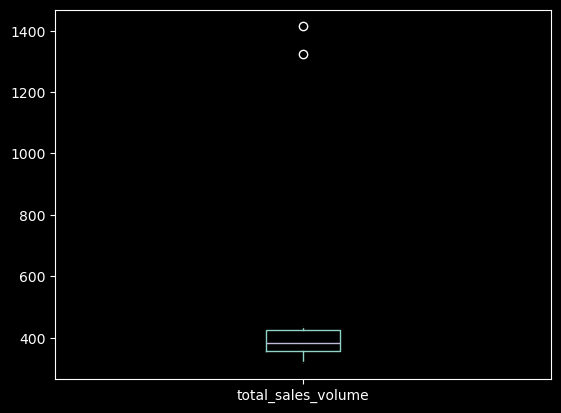

In [ ]:
# Boxplot to visualize outliers in total_sales_volume
icsd_q3_df.boxplot(column='total_sales_volume', grid=False)
plt.show()


From this boxplot we can see there are what appears to be two outliers. Lets check which ones would be

In [ ]:
# From this boxplot we can see there are what appears to be two outliers. Lets check which ones would be

# Check for outliers in continuous variables
outliers = icsd_q3_df['total_sales_volume'].describe()
print("\nSummary of the numerical features, including outliers:")
display(outliers)



Summary of the numerical features, including outliers:


count      12.000000
mean      541.083333
std       388.638991
min       320.000000
25%       357.500000
50%       382.500000
75%       423.750000
max      1414.000000
Name: total_sales_volume, dtype: float64

In [ ]:
# Calculating IQR and bounds for outlier detection
# IQR method to detect outliers
# IQE = Q3 - Q1
Q1 = icsd_q3_df['total_sales_volume'].quantile(0.25)
Q3 = icsd_q3_df['total_sales_volume'].quantile(0.75)
IQR = Q3 - Q1
print("\nThe Interquartile Range (IQR) is:", IQR)



The Interquartile Range (IQR) is: 66.25


In [ ]:
# Calculating the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("\nThe lower bound for detecting outliers is:", lower_bound)
print("The upper bound for detecting outliers is:", upper_bound)




The lower bound for detecting outliers is: 258.125
The upper bound for detecting outliers is: 523.125


In [ ]:
# Identifying the outlier months based on the calculated bounds
outlier_months = icsd_q3_df[(icsd_q3_df['total_sales_volume'] < lower_bound) | (icsd_q3_df['total_sales_volume'] > upper_bound)]
print("\nThe months with outlier total sales volume are:");
display(outlier_months)



The months with outlier total sales volume are:


,sale_year,sale_month,total_sales_volume
2,2024,July,1414
9,2025,June,1324


In [ ]:
# Answer: The months with outlier total sales volume are:
print("The months with outlier total sales volume are:");
display(outlier_months)


The months with outlier total sales volume are:


,sale_year,sale_month,total_sales_volume
2,2024,July,1414
9,2025,June,1324


In [ ]:
# # Note: pandas and numpy are already imported as pd and np
# # The following tables are loaded as pandas DataFrames with the same names: ice_cream_sales_data
# # Please print your final result or dataframe

#   # Load the ice cream sales data
# icsd_df = ice_cream_sales_data.copy()
# print(icsd_df)
# print("=" * 100)
# print()

# # Display initial information about the dataframe
# print(icsd_df.info())
# print("=" * 100)
# print()

# # Comments: We can see from the dataframe information that there is a total of 61 entries and there are mising values only on the temperature column.
# # Duplicate values are yet to be found 

# # Finding null values in the dataframe
# missing_values = icsd_df.isnull().sum()
# print("The number of missing values in each column of the data set is:");
# print(missing_values)
# print()

# # Identifying all null values
# all_missing_rows = icsd_df[icsd_df.isnull().any(axis=1)]
# print("All rows with missing values in the data set are:");
# print(all_missing_rows)
# print("=" * 100)
# print()

# # Checking complete duplicate record
# duplicate_record = icsd_df.duplicated().sum()
# print("The number of duplicate records in the data set is:");
# print(duplicate_record)
# print()

# # Identifying all duplicate rows including the first occurrence
# all_duplicate_rows = icsd_df[icsd_df.duplicated(keep=False)]
# print("All duplicate rows in the data set are:");
# print(all_duplicate_rows)
# print("=" * 100)
# print()

# # Based on the two results above, we can see that there are two rows with Null Vlues for temperature and one complete duplicate row. 
# # Taking into account the dataframe is of 61 records, it seems fitting that it should be 60. So we will determine to remove or "drop" the duplicate row.

# # Address the null values by replacing them with the mean of the column
# icsd_df['temperature'] = icsd_df["temperature"].fillna(icsd_df["temperature"].median())
# print(icsd_df.info())
# print()

# # Dropping duplicate rows
# icsd_df = icsd_df.drop_duplicates()
# print(icsd_df.info())
# print("=" * 100)
# print()

# # Final cleaned dataframe and answer
# cleaned_icsd_df = icsd_df
# print("The cleaned data set without null values and duplicate records is:");
# print(cleaned_icsd_df)
# print(cleaned_icsd_df.info())
# print("=" * 100)
# print()

# ###################################

# icsd_q2_df = cleaned_icsd_df.copy()
# print(icsd_q2_df.head())
# print(icsd_q2_df.info())
# print("=" * 100)
# print()

# # First we need to change the sales_date column to datetime format
# icsd_q2_df["sale_date"] = pd.to_datetime(icsd_q2_df["sale_date"], format="%Y-%m-%d")
# print(icsd_q2_df.info())
# print(icsd_q2_df.head())
# print("=" * 100)
# print()

# # Now we create two new columns for month and year. Note that the month will be in string format
# icsd_q2_df['sale_month'] = icsd_q2_df['sale_date'].dt.month_name()
# icsd_q2_df['sale_year'] =icsd_q2_df['sale_date'].dt.year

# month_year_icsd_df = icsd_q2_df
# print(month_year_icsd_df.head())
# print(month_year_icsd_df.info())
# print("=" * 100)
# print()

# #Now we have to do a group by on the month and temperature range columns to get the total sales volume
# monthy_sales_volume_df = month_year_icsd_df.groupby(['sale_year', 'sale_month', 'temperature']).agg(total_sales_volume = ('sales_volume', 'sum')).sort_values(by=['sale_month', 'sale_year', 'temperature'])

# # We reset the index to make sale_year and sale_month columns again instead of index
# icsd_q2_df = monthy_sales_volume_df.reset_index()
# icsd_q2_df
# print("=" * 100)
# print()

# # Now we sort the dataframe by year and month in ascending order for better readability
# icsd_q2_df = icsd_q2_df.sort_values(['sale_year','sale_month'], ascending=True)
# print(icsd_q2_df)
# print("=" * 100)
# print()

# # Now we create temperature ranges using pd.cut()
# # We define the bins and labels for the temperature ranges using np.inf to cover all possible values above and below certain thresholds
# temperature_bins = [-np.inf, 60, 70, 80, 90, 100, np.inf]
# temperature_labels = ['<60', '60-69', '70-79', '80-89', '90-99', '100+']

# icsd_q2_df['temperature_range'] = pd.cut(icsd_q2_df['temperature'], bins=temperature_bins, labels=temperature_labels, right=False)
# print(icsd_q2_df)
# print("=" * 100)
# print()

# # Now we can create the pivot table
# pivot_table = icsd_q2_df.pivot_table(index= ['sale_year', 'sale_month'], columns='temperature_range', values=['total_sales_volume'], observed=True, aggfunc='sum', fill_value=0)
# print(pivot_table)
# print("=" * 100)
# print()
# print("=" * 100)
# print()

# # Answer: The pivot table summarizing the total sales volume of ice cream products by month and temperature range is displayed above.
# print("The pivot table summarizing the total sales volume of ice cream products by month and temperature range is:");
# print(pivot_table)

# #############################################################

# icsd_q3_df = month_year_icsd_df.copy()
# print(icsd_q3_df)
# print("=" * 100)
# print()

# print(icsd_q3_df.head())
# print(icsd_q3_df.info())
# print("=" * 100)
# print()

# #Now we have to do a group by on the month and temperature range columns to get the total sales volume
# monthy_sales_volume_df = icsd_q3_df.groupby(['sale_year', 'sale_month']).agg(total_sales_volume = ('sales_volume', 'sum')).sort_values(by=['sale_month', 'sale_year'])
# # Now we sort the dataframe by year and month in ascending order for better readability
# monthy_sales_volume_df = monthy_sales_volume_df.sort_values(['sale_year','sale_month'], ascending=True)

# # We reset the index to make sale_year and sale_month columns again instead of index
# icsd_q3_df = monthy_sales_volume_df.reset_index()
# print(icsd_q3_df)
# print("=" * 100)
# print()

# # # Boxplot to visualize outliers in total_sales_volume
# # icsd_q3_df.boxplot(column='total_sales_volume', grid=False)
# # print(plt.show())

# # From this boxplot we can see there are what appears to be two outliers. Lets check which ones would be

# # Check for outliers in continuous variables
# outliers = icsd_q3_df['total_sales_volume'].describe()
# print("\nSummary of the numerical features, including outliers:")
# print(outliers)
# print("=" * 100)
# print()

# # Calculating IQR and bounds for outlier detection
# # IQR method to detect outliers
# # IQE = Q3 - Q1
# Q1 = icsd_q3_df['total_sales_volume'].quantile(0.25)
# Q3 = icsd_q3_df['total_sales_volume'].quantile(0.75)
# IQR = Q3 - Q1
# print("\nThe Interquartile Range (IQR) is:", IQR)
# print("=" * 100)
# print()

# # Calculating the lower and upper bounds for outlier detection
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# print("\nThe lower bound for detecting outliers is:", lower_bound)
# print("The upper bound for detecting outliers is:", upper_bound)
# print("=" * 100)
# print()

# # Identifying the outlier months based on the calculated bounds
# outlier_months = icsd_q3_df[(icsd_q3_df['total_sales_volume'] < lower_bound) | (icsd_q3_df['total_sales_volume'] > upper_bound)]
# print("\nThe months with outlier total sales volume are:");
# print(outlier_months)
# print("=" * 100)
# print()

# # Answer: The months with outlier total sales volume are:
# print("The months with outlier total sales volume are:");
# print(outlier_months)
# print("=" * 100)
# print()
